## Data Incubator Challenge Notebook
This note book provides a few basic plot of the review topics produced from Latent Dirichlet Allocation on the Yelp review dataset, https://www.yelp.com/dataset. For more data exploration, please refer to other notebooks in the repository or visit the propotype app on heroku, https://whispering-sands-84821.herokuapp.com/.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
BB = pd.read_csv("LDA_models/Bacchanal_topics.csv", usecols=['stars','topic_united', 'business_id'])

## Topics from LDA model
The LDA model I ran prdouced 15 topics from the whole restaurant reviews. By examining reviews in each topic, I manually group several topics and assign a category for each topic. Here I provide a plot of the review counts for each topic extracted from LDA model.

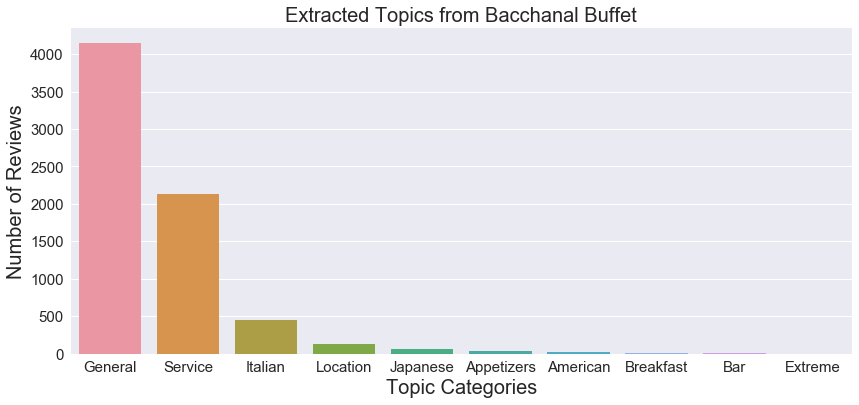

In [35]:
BB_topic = BB.groupby('topic_united')['stars'].count().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax = sns.barplot("topic_united", 'stars', data=BB_topic)
ax.tick_params('x', labelsize=15)
ax.tick_params('y', labelsize=15)
plt.xlabel('Topic Categories', fontsize=20)
plt.ylabel('Number of Reviews', fontsize=20)
plt.title('Extracted Topics from Bacchanal Buffet', fontsize=20)
plt.show()

## Ratings for Selected Topics
In the following selected topics, I plot the review counts vs. ratings, showing that each topic has a slight different distribution in terms of rating. For example, the general comment people give has nice natural decay from 5 star to 1 star, while for Service, there is a bimodal behavior, where people tend to complain about the serviecs. Therefore, by analyzing the ratings, sentiment for each topic, an app can be developed such that users are able to filter out irrelavent topics and focus on their concerns. Finally, by juding from the sentiment score and reading reviews of specific topics, users would feel more confident and releaxed to make a decision.

In [36]:
# BB_subset = BB[BB['topic_united'].isin(['General', 'Service', 'Appetizers', 'American'])]
# sns.set(font_scale=1.5)
# g = sns.FacetGrid(data=BB_subset, col='topic_united', col_wrap=2, sharey=False, size=4)
# g.map(plt.hist, 'stars', bins=5, edgecolor='k', rwidth=.8)
# plt.show()

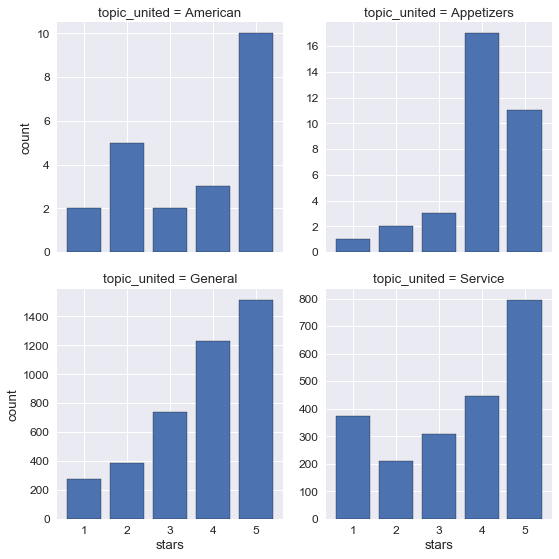

In [38]:
BB_subset = BB[BB['topic_united'].isin(['General', 'Service', 'Appetizers', 'American'])]
BB_topic_star = BB_subset.groupby(['topic_united', 'stars']).count().rename(columns={'business_id': 'count'}).reset_index()
sns.set(font_scale=1.2)
g = sns.FacetGrid(data=BB_topic_star, col='topic_united', col_wrap=2, sharey=False, size=4)
g.map(plt.bar, 'stars', 'count', edgecolor='k')
plt.show()